In [65]:
import os
import numpy as np

GZ = '../data/compressed/'
RAW = '../data/uncompressed/'

In [268]:
i = 0

def unzip(path):
    for file in os.listdir(path):
        !bash unzip_file.sh {file}
        
def readData(path):
    ans = {}
    for file in os.listdir(path):
        data = np.fromfile('../data/uncompressed/'+file,dtype='float32')
        data = np.array(data)
        data = np.reshape(data, (241,241))
        ans[file] = [data, file]
    return ans

def getCoords(cluster):
    x = 0
    y = 0
    vx = []
    vy = []

    for i in range(len(cluster)):
        for j in range(len(cluster)):
            if cluster[x][y] != 0:
                vx.append(x)
                vy.append(y)
            y += 1
        x += 1
        y = 0
        
    return vx,vy

In [37]:
unzip(GZ)

In [275]:
dados = readData(RAW)

In [263]:
k = list(dados.keys())
cluster = dados[k[0]][0]

In [277]:
dados

{'R12345678_201402010124.raw': [array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  'R12345678_201402010124.raw'],
 'R12345678_201402010136.raw': [array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  'R12345678_201402010136.raw'],
 'R12345678_201402010112.raw': [array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  'R12345678_201402010112.raw']

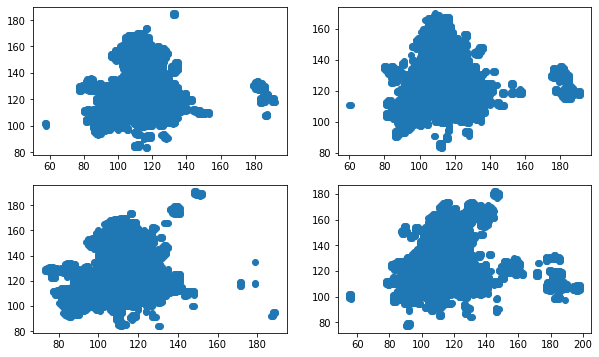

In [297]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2,2, figsize=(10,6))

kk = []
for cluster in dados.keys():
    kk.append(getCoords(dados[cluster][0]))
    
ax[0][0].scatter(kk[0][0], kk[0][1])

ax[0][1].scatter(kk[1][0], kk[1][1])
# ax[0][1].scatter()

ax[1][0].scatter(kk[2][0], kk[2][1])
# ax[1][0].scatter()

ax[1][1].scatter(kk[3][0], kk[3][1])
# ax[1][1].scatter()

plt.show()